<a href="https://colab.research.google.com/github/yolandaeka/DataMining_2024/blob/main/kmeans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels:  [0 0 0 1 1 1]
Centroids:  [[1. 2.]
 [4. 2.]]


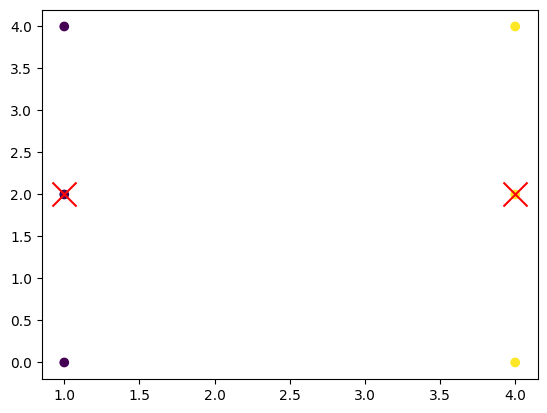

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# membuat data dummy
x = np.array([[1,2],[1,4],[1,0],
              [4,2],[4,4],[4,0]])

# membuat model kmeans dengan jumlah kluster 2
kmeans = KMeans(n_clusters=2, random_state=0)

# melatih model
kmeans.fit(x)

# melihat hasil kluster masing masing
labels = kmeans.labels_
print("Labels: ",labels)

# melihat centorid
centroids = kmeans.cluster_centers_
print("Centroids: ", centroids)

#plotting hasil klustering
plt.scatter(x[:,0], x[:,1], c = labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], s = 300, c = 'red', marker = 'x')
plt.show()

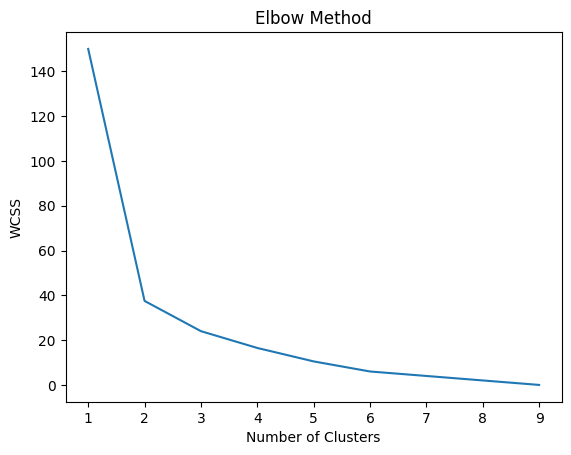

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

#membuat data dummy
x = np.array([[1,2], [1,4], [1,0],
             [4,2], [4,4], [4,0],
             [10,2],[10,4],[10,0]])

wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


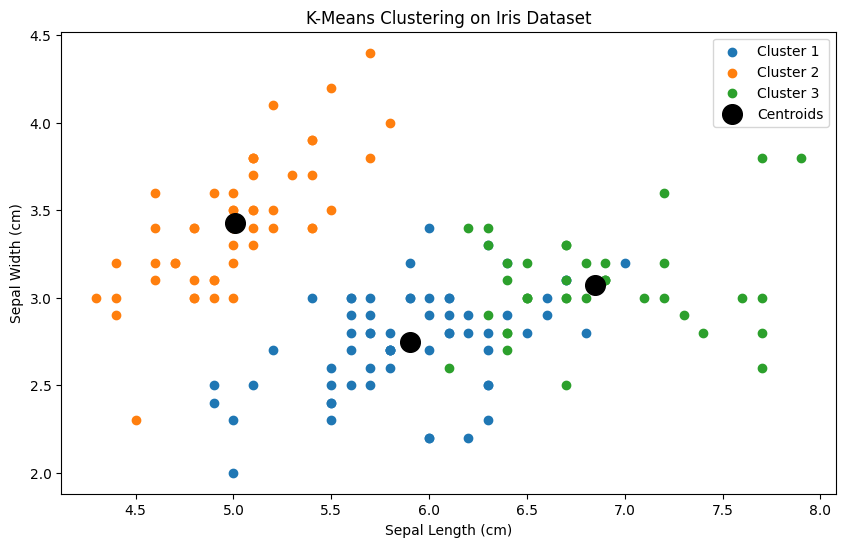

Inertia: 78.851441426146
Silhouette Score: 0.5528190123564095


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load dataset Iris
iris = load_iris()
X = iris.data # Fitur-fitur (panjang kelopak, lebar kelopak, panjang daun, lebar daun)
y = iris.target # Kelas target
# Menentukan jumlah cluster
n_clusters = 3

# Membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters)
# Melatih model KMeans
kmeans.fit(X)
# Mendapatkan label dari clustering
labels = kmeans.labels_


# Mendapatkan pusat cluster
centers = kmeans.cluster_centers_
# Plot hasil clustering
plt.figure(figsize=(10, 6))
# Plot setiap cluster
for i in range(n_clusters):
  # Memilih data yang termasuk dalam cluster i
  cluster_X = X[labels == i]
  # Plot data cluster dengan warna yang berbeda
  plt.scatter(cluster_X[:, 0], cluster_X[:, 1], label=f'Cluster {i + 1}')

# Plot pusat cluster
plt.scatter(centers[:, 0], centers[:, 1], marker='o', color='black', s=200, label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

# Menghitung inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Menghitung silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


In [7]:
!pip install spotipy




In [13]:
!pip install spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans
import pandas as pd

# Inisialisasi koneksi dengan Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id='2421cb7a062a4e47abd9244556451288', client_secret='06806e82b4fa4e349a0897956dc82dc8')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Fungsi untuk mendapatkan track playlist dari Spotify
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Fungsi untuk mendapatkan fitur audio dari playlist
def get_audio_features(tracks):
    ids = [track['track']['id'] for track in tracks]
    features = sp.audio_features(ids)
    return features

# Mengambil Playlist spotify
username = 's478nhmm4jmm33f2t08d1v0yt'
playlist_id = '37i9dQZF1EIV1oCGxzhRed'
tracks = get_playlist_tracks(username, playlist_id)

# Mengambil fitur audio untuk lagu-lagu dari playlist
features = get_audio_features(tracks)

# Ekstrak nama seluruh lagu
track_names = [track['track']['name'] for track in tracks]

# Membuat DataFrame dari nama lagu dan fitur audio
df = pd.DataFrame(features)
df['track_name'] = track_names  # tambahkan nama lagu ke DataFrame

# Ambil fitur yang dibutuhkan untuk clustering
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']]

# Isikan jumlah cluster
n_clusters = 5

# Buat Model KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Train model KMeans
kmeans.fit(X)

# Ambil label cluster
labels = kmeans.labels_

# tambahkan label cluster ke DataFrame
df['cluster'] = labels

# Tampilkan lagu untuk tiap cluster
for cluster_id in range(n_clusters):
    cluster_songs = df[df['cluster'] == cluster_id]['track_name']
    print(f'Cluster {cluster_id + 1} Songs:')
    print(cluster_songs)
    print()

Cluster 1 Songs:
5     What Was I Made For? [From The Motion Picture ...
12                                 But Daddy I Love Him
24                                                Lover
32                                                 loml
36                                Fresh Out The Slammer
44                                      How Did It End?
Name: track_name, dtype: object

Cluster 2 Songs:
1                                       vampire
6                                      Down Bad
14                              So Long, London
17                                     ceilings
18              The Smallest Man Who Ever Lived
28    Florida!!! (feat. Florence + The Machine)
34                                The Black Dog
35                              drivers license
41                             End of Beginning
48                               Don’t Blame Me
Name: track_name, dtype: object

Cluster 3 Songs:
3     we can't be friends (wait for your love)
4              I Can

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
